In [1]:
#Importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("bank.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
# Checking for null values and type of value in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
# checking if all columns have unique values
collist=df.columns.to_list()
for i in collist: 
    print(df[i].unique())

[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
['no' 'yes']
[2343   45 1270 ... 1594 2593 -134]
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[1042 1467 1389 ... 1504  818 1812]
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154

In [6]:
# Checking for count of deposit
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [7]:
#DataFrame Shuffling
df_sf = df.sample(frac=1,random_state=42).reset_index(drop=True)
df_sf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,65,retired,divorced,secondary,no,744,no,no,cellular,5,jul,182,1,-1,0,unknown,no
1,38,blue-collar,married,secondary,no,1627,no,no,unknown,16,jun,1323,9,-1,0,unknown,yes
2,35,blue-collar,single,secondary,no,4963,yes,no,cellular,14,may,456,1,300,1,failure,yes
3,47,blue-collar,married,secondary,no,8229,no,no,cellular,8,aug,784,2,-1,0,unknown,yes
4,35,technician,married,tertiary,no,1473,yes,no,unknown,12,may,84,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,47,management,married,tertiary,no,761,yes,no,cellular,11,jul,80,2,-1,0,unknown,no
11158,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
11159,35,technician,married,secondary,no,1144,no,no,cellular,20,aug,197,13,-1,0,unknown,no
11160,51,retired,married,tertiary,no,746,no,no,cellular,25,aug,372,5,-1,0,unknown,yes


In [67]:
code={'yes':1,'no':0}
df_sf['deposit']=df_sf['deposit'].map(code)

In [72]:
# setting deposit as 'y' for the model
y=df_sf['deposit']
y

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11157   NaN
11158   NaN
11159   NaN
11160   NaN
11161   NaN
Name: deposit, Length: 11162, dtype: float64

In [10]:
#SET X
x=df_sf.drop('deposit',axis=1)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,65,retired,divorced,secondary,no,744,no,no,cellular,5,jul,182,1,-1,0,unknown
1,38,blue-collar,married,secondary,no,1627,no,no,unknown,16,jun,1323,9,-1,0,unknown
2,35,blue-collar,single,secondary,no,4963,yes,no,cellular,14,may,456,1,300,1,failure
3,47,blue-collar,married,secondary,no,8229,no,no,cellular,8,aug,784,2,-1,0,unknown
4,35,technician,married,tertiary,no,1473,yes,no,unknown,12,may,84,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,47,management,married,tertiary,no,761,yes,no,cellular,11,jul,80,2,-1,0,unknown
11158,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success
11159,35,technician,married,secondary,no,1144,no,no,cellular,20,aug,197,13,-1,0,unknown
11160,51,retired,married,tertiary,no,746,no,no,cellular,25,aug,372,5,-1,0,unknown


In [11]:
# Making necessary dummy columns
x=pd.get_dummies(x,dtype='int')
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,65,744,5,182,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38,1627,16,1323,9,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,35,4963,14,456,1,300,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,47,8229,8,784,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,35,1473,12,84,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,47,761,11,80,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11158,28,159,16,449,2,33,4,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11159,35,1144,20,197,13,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,51,746,25,372,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
#checking all the new columns (dummy focused)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   job_admin.           11162 non-null  int32
 8   job_blue-collar      11162 non-null  int32
 9   job_entrepreneur     11162 non-null  int32
 10  job_housemaid        11162 non-null  int32
 11  job_management       11162 non-null  int32
 12  job_retired          11162 non-null  int32
 13  job_self-employed    11162 non-null  int32
 14  job_services         11162 non-null  int32
 15  job_student          11162 non-null  int32
 16  job_technician       1

In [13]:
#  train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [74]:
# we have not shuffled because train test will shuffle the data

### Decision Tree Classifier

In [16]:
#Model Building
mod1=DecisionTreeClassifier(max_depth=7)
                            
#running the model
mod1.fit(xtrain,ytrain)

#Running the predictions
pred1=mod1.predict(xtest)

#Model performance evaluation by Classification Report 
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1175
           1       0.78      0.83      0.80      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [17]:
#Initialising the classifier
dt_classifier = DecisionTreeClassifier(random_state = 41)

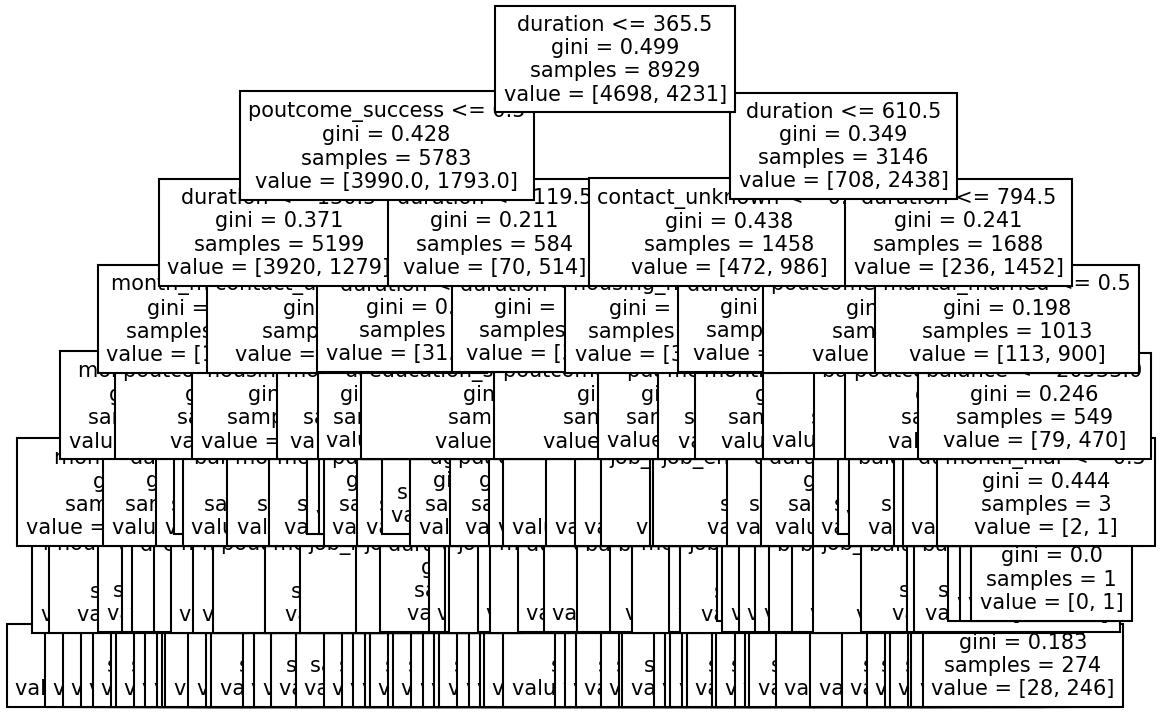

In [18]:
#plot decision tree model
x_cols=x.columns
plt.figure(figsize=(8,6),dpi=150)
plot_tree(mod1, fontsize=10,feature_names=x_cols);

In [19]:
# Confusion Matrix

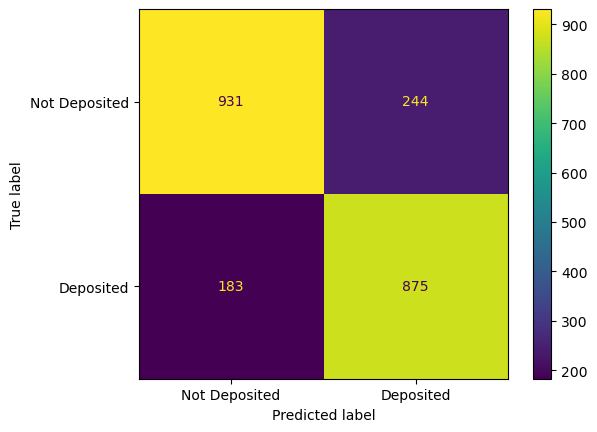

In [20]:
#Confusion matrix computations
conf_mat=confusion_matrix(ytest,pred1)
#cm display
ConfusionMatrixDisplay(conf_mat,display_labels=['Not Deposited','Deposited']).plot()

In [86]:
#Extract features that influence the possibility of depositing
feat_imp=mod1.feature_importances_
# Extracting column names from x
x_cols=x.columns

# Create DataFrame with feature importances and column name
feat_impdf = pd.DataFrame(data=feat_imp, index=x_cols, columns=['Importance'])
feat_impdf

# Sort by 'Importance' and show top 25 features
feat_impdf.sort_values(by='Importance', ascending=False).head(25)


,Importance
duration,0.496743
poutcome_success,0.186353
contact_unknown,0.101474
housing_yes,0.045320
balance,0.031166
month_mar,0.024652
month_oct,0.013002
month_apr,0.012198
month_aug,0.011587
day,0.011510


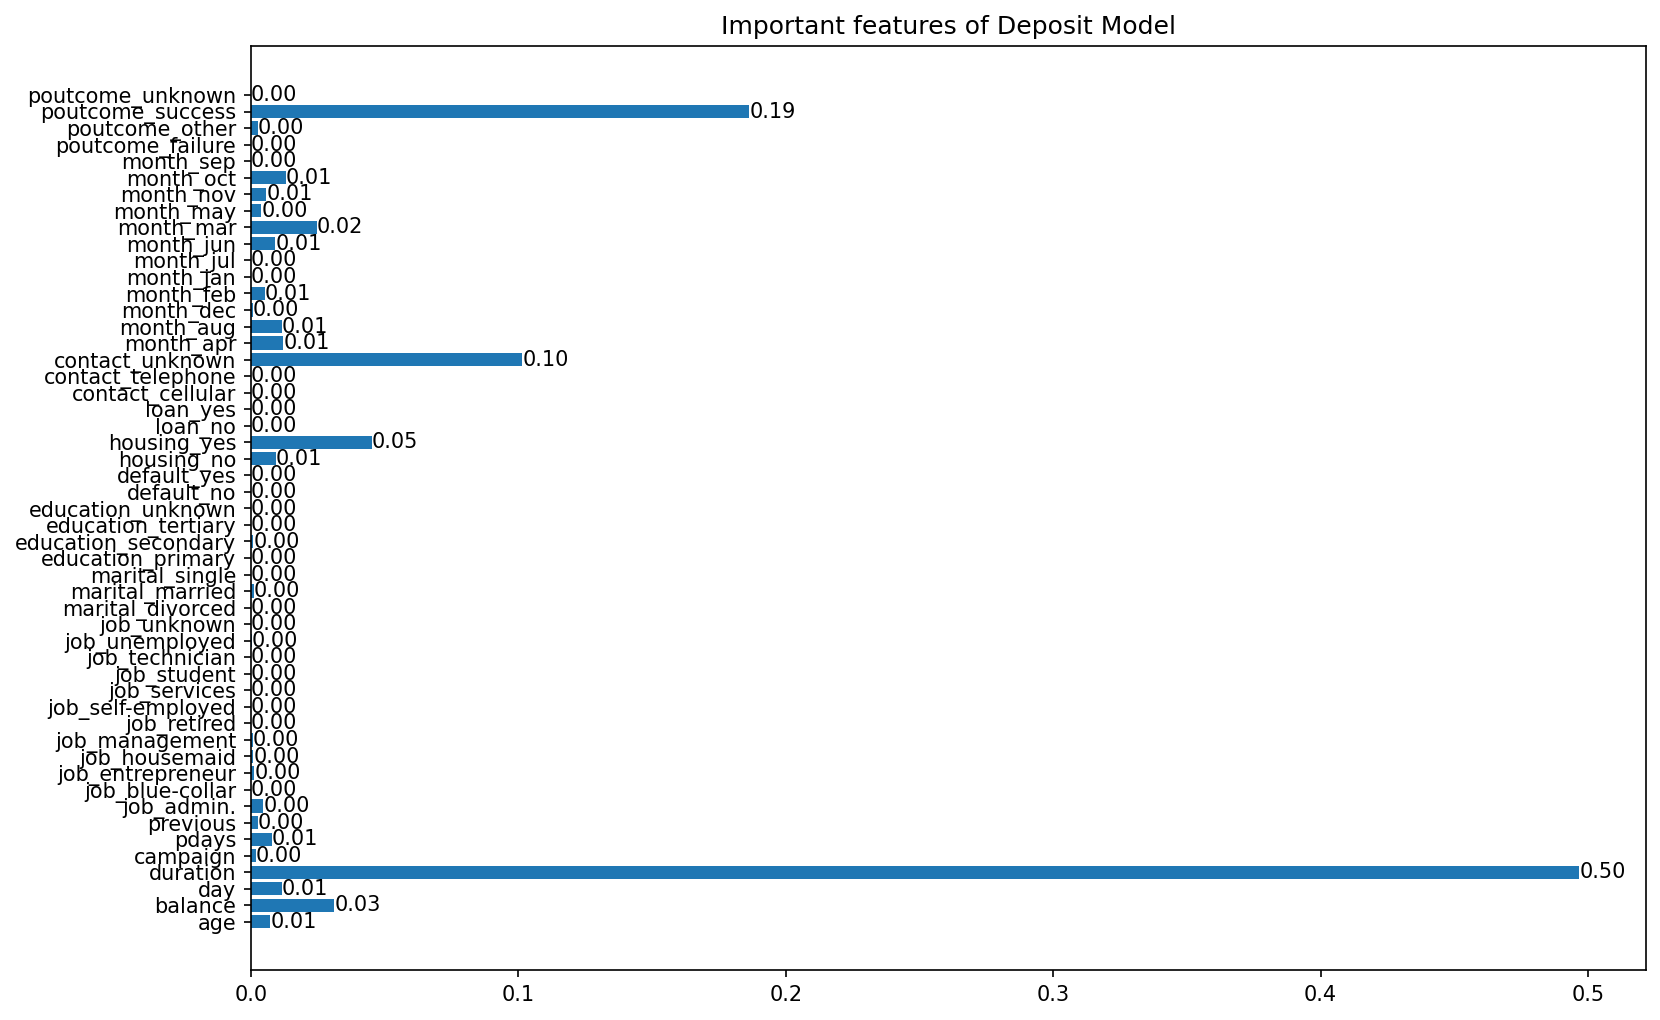

In [63]:
#Making a visualization
plt.figure(figsize=(12,8), dpi=150)
bars=plt.barh(y=x_cols,width=feat_imp)
plt.bar_label(bars,fmt='%1.2f')
plt.title("Important features of Deposit Model")
plt.show();

### Random Tree Classifier

In [24]:
mod2=RandomForestClassifier(n_estimators=500,max_depth=7,random_state=43)
mod2.fit(xtrain,ytrain)
pred_rfc=mod2.predict(xtest)
print(classification_report(ytest,pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1175
           1       0.81      0.85      0.83      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [88]:
#Extract features that influence the possibility of deposits
feat_imp2=mod2.feature_importances_
# Extracting column names from x
x_cols=x.columns

#Converting feature importance as df
feat_impdf2=pd.DataFrame(data=feat_imp2, index=x_cols)
feat_impdf2
feat_impdf2.sort_values(by=0,ascending=False).head(10)

,0
duration,0.437825
poutcome_success,0.080719
contact_unknown,0.055692
pdays,0.043434
contact_cellular,0.037796
age,0.035468
housing_yes,0.032015
housing_no,0.029957
previous,0.029421
balance,0.025207


### K-Neighbors Classifier

In [27]:
mod3=KNeighborsClassifier()
mod3.fit(xtrain,ytrain)
pred_knc=mod3.predict(xtest)
print(classification_report(ytest,pred_knc))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1175
           1       0.72      0.69      0.71      1058

    accuracy                           0.73      2233
   macro avg       0.73      0.73      0.73      2233
weighted avg       0.73      0.73      0.73      2233



In [28]:
# our K neighbor is performing slightly worse than DTC or random forest

Text(0.5, 1.0, 'KNeighbors Classification')

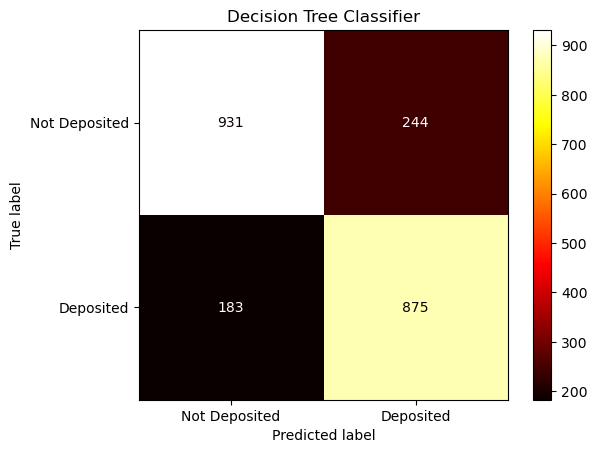

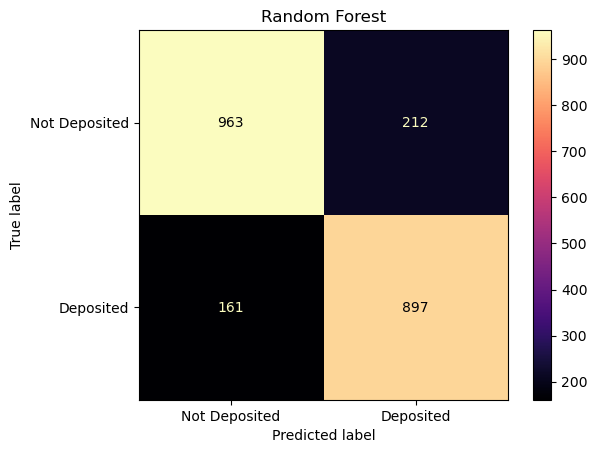

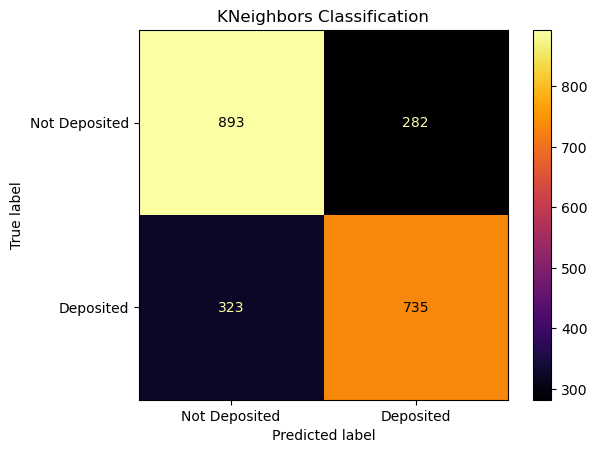

In [103]:
conf_mat_a1 = confusion_matrix(ytest, pred1)
#cm display
disp_a1 = ConfusionMatrixDisplay(conf_mat_a1, display_labels = ['Not Deposited','Deposited'])
disp_a1.plot(cmap='hot')
plt.title('Decision Tree Classifier')

conf_mat_a2=confusion_matrix(ytest,pred_rfc)
#cm display
disp_a2 = ConfusionMatrixDisplay(conf_mat_a2,display_labels=['Not Deposited','Deposited'])
disp_a2.plot(cmap='magma')
plt.title('Random Forest')

conf_mat_a3=confusion_matrix(ytest,pred_knc)
#cm display
disp_a3=ConfusionMatrixDisplay(conf_mat_a3,display_labels=['Not Deposited','Deposited'])
disp_a3.plot(cmap='inferno')
plt.title('KNeighbors Classification')

# Confusing Matrix display

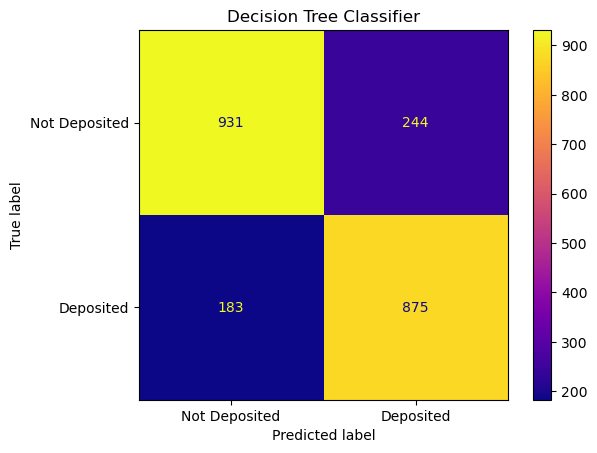

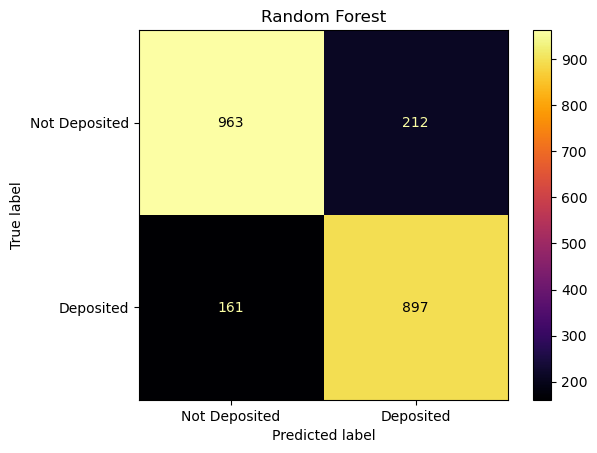

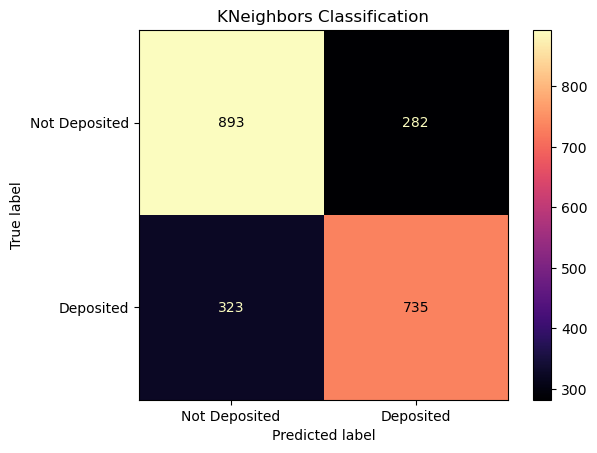

In [31]:
conf_mat1=confusion_matrix(ytest,pred1)
#cm display
disp1=ConfusionMatrixDisplay(conf_mat1,display_labels=['Not Deposited','Deposited'])
disp1.plot(cmap='plasma')
plt.title('Decision Tree Classifier')

conf_mat2=confusion_matrix(ytest,pred_rfc)
#cm display
disp2=ConfusionMatrixDisplay(conf_mat2,display_labels=['Not Deposited','Deposited'])
disp2.plot(cmap='inferno')
plt.title('Random Forest')

conf_mat3=confusion_matrix(ytest,pred_knc)
#cm display
disp3=ConfusionMatrixDisplay(conf_mat3,display_labels=['Not Deposited','Deposited'])
disp3.plot(cmap='magma')
plt.title('KNeighbors Classification');

#Among the models tested, Random Forest Classifier achieved the highest F1-score and balanced accuracy, indicating it performs better than Decision Tree and KNN for predicting customer deposits.